# Superstore Sales Dataset

In [59]:
import pandas as pd # Data Manipulation and Analysis
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Data Manipulation
import seaborn as sns # Data Manipulation 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # Ignore warning

In [60]:
df = pd.read_csv(r'c:\Users\pawar\Downloads\train.csv') 
#To load the csv file in jupyter notebook assuming your dataset is a CSV file named 'train.csv'

In [61]:
df.head() # First Five rows of the dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.shape # shape of the dataset

(9800, 18)

 9800 rows & 18 columns

In [7]:
df.describe() # Summary Statistics of numerical columns

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.dtypes # Data Types of columns 

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [9]:
df.isnull().sum() # Missing Values in the dataset

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
df.drop(columns=['Postal Code'], inplace=True) # Drop is used for to drop a specific column 

In [11]:
df.duplicated().sum() # Count the number of duplicated rows in dataframe

0

# Univariate Analysis(Single Variable Analysis):

Univariate analysis is the simplest form of statistical analysis. It involves looking at one variable at a time to 
understand the data distribution

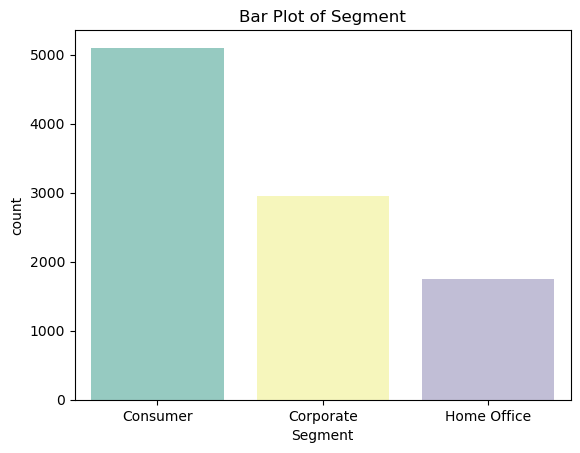

In [21]:
sns.countplot(data=df, x='Segment',palette ='Set3')
plt.title('Bar Plot of Segment')
plt.show()

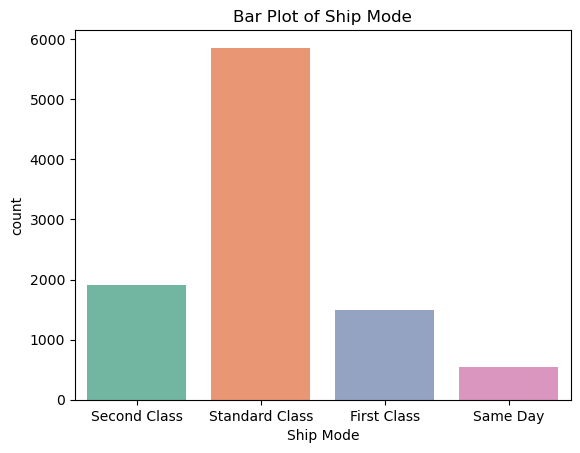

In [28]:
sns.countplot(data=df, x='Ship Mode',palette ='Set2')
plt.title('Bar Plot of Ship Mode')
plt.show()

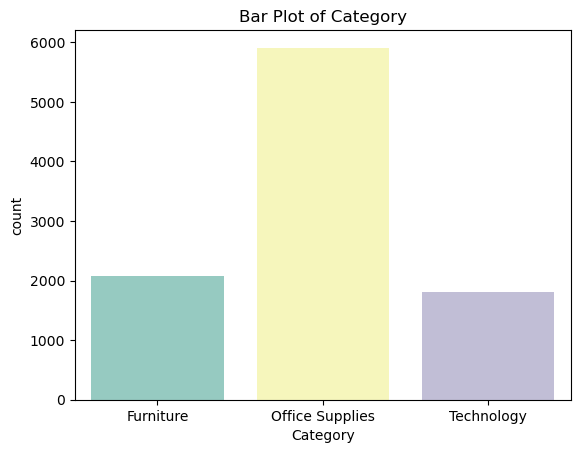

In [38]:
sns.countplot(data=df, x='Category',palette ='Set3') # 
plt.title('Bar Plot of Category')
plt.show()

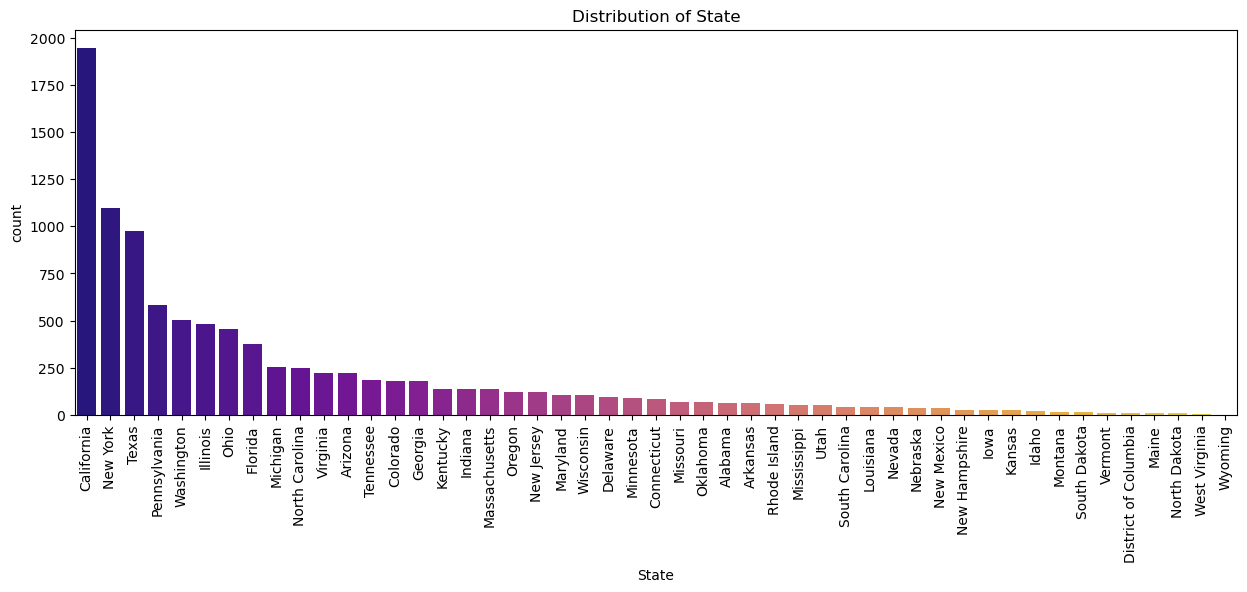

In [47]:
plt.figure(figsize = (15,5))
order= df['State'].value_counts().index
sns.countplot(data=df, x='State',order=order,palette='plasma')
plt.title("Distribution of State")
plt.xticks(rotation=90)
plt.show()

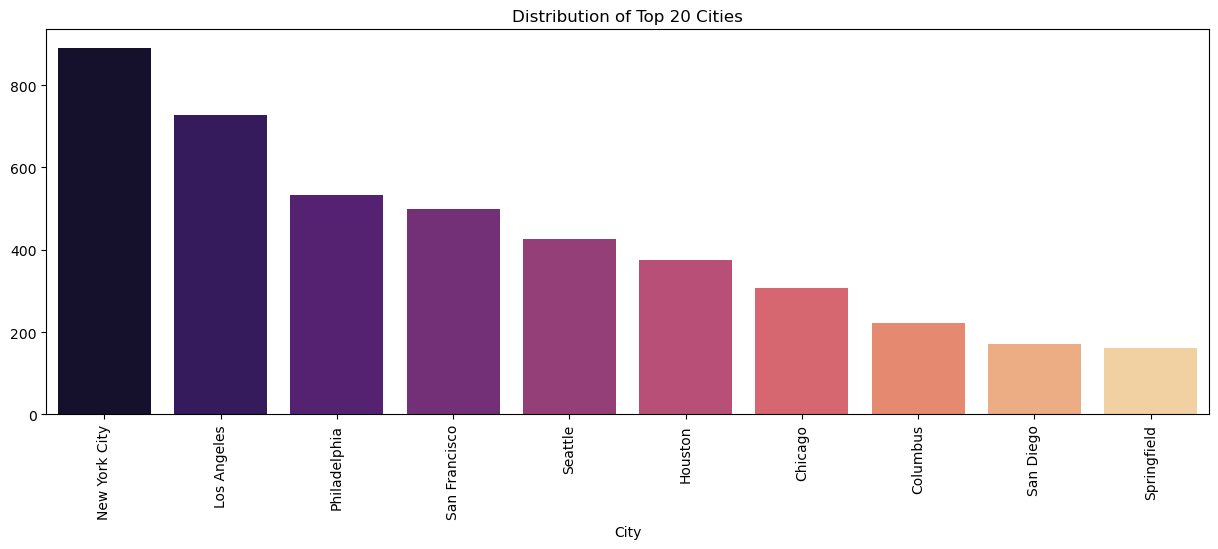

In [64]:
plt.figure(figsize=(15, 5))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')
plt.title("Distribution of Top 20 Cities")
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis(Multiple Variable Analyis)

The Bivariate looks at the relationship between two variables, while multivariate analysis looks at the relationships 
between multiple variables.

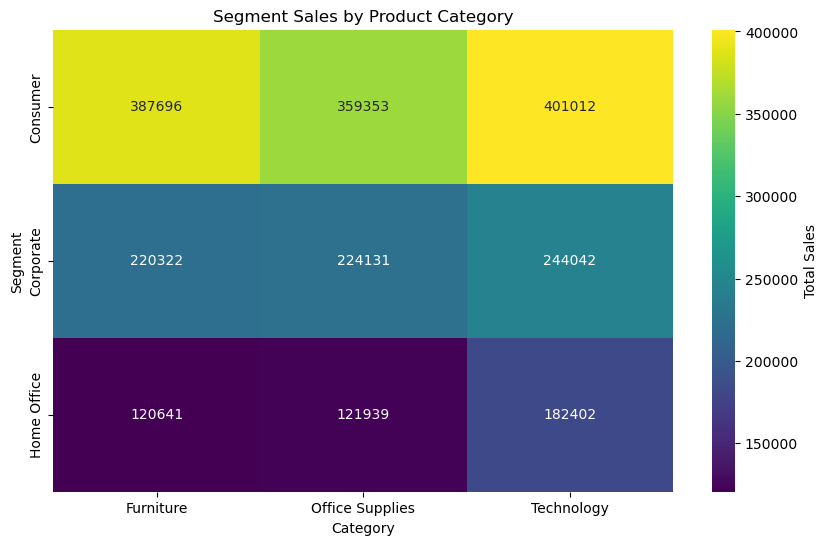

In [54]:
heatmap_data = df.pivot_table(index='Segment', columns='Category', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.0f', cbar_kws={'label':'Total Sales'})
plt.title("Segment Sales by Product Category")
plt.show()

In [58]:
df.summary = df.groupby(['Category', 'Sub-Category',])['Sales'].sum().reset_index()
df.summary

,Category,Sub-Category,Sales
0,Furniture,Bookcases,113813.1987
1,Furniture,Chairs,322822.7310
2,Furniture,Furnishings,89212.0180
3,Furniture,Tables,202810.6280
4,Office Supplies,Appliances,104618.4030
5,Office Supplies,Art,26705.4100
6,Office Supplies,Binders,200028.7850
7,Office Supplies,Envelopes,16128.0460
8,Office Supplies,Fasteners,3001.9600
9,Office Supplies,Labels,12347.7260


In [63]:
# Summarize the Sales data by Category, Ship Mode, and Sub-Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Region'])['Sales'].sum().reset_index()

# Create a treemap
fig = px.treemap(
    df_summary,
    path=['Category', 'Ship Mode', 'Region'],
    values='Sales',
)
fig.show()